# Lab3 (Teacher version): robustness of a graph 

We can use the following libraries.

In [7]:
import matplotlib.pyplot as plt
import math
import sys
from random import *
from collections import deque
import copy, random
print(sys.version)

3.8.10 (default, Nov 26 2021, 20:14:08) 
[GCC 9.3.0]


In this lab session, we investigate the notion of robustness of a graph: how well a graph remains connected when nodes disappear following random failures or degree-based failures.

## Exercise 1: preliminary work

### Question 1

Using the code seen in previous labs, load the following graph as a dictonary of lists:

http://lioneltabourier.fr/documents/inet.txt


In [4]:
def remove_loop_dupes(graph):
    for node in graph:
        graph[node] = list(dict.fromkeys(graph[node]))
        try:
            graph[node].remove(node)
        except ValueError:
            pass

def graph_from_file(file_name):
    graph = {}
    with open(file_name, "r") as graph_file:
        for line in graph_file:
            try:
                node1, node2 = [int(node) for node in line.split()]
                if node1 not in graph:
                    graph[node1] = []
                graph[node1].append(node2)
                if node2 not in graph:
                    graph[node2]= []
                graph[node2].append(node1)
            except:
                pass
    remove_loop_dupes(graph)
    return graph


def graph_to_file(graph, file_name):
    with open(file_name, "w") as graph_file:
        for node1 in graph:
            for node2 in graph[node1]:
                graph_file.write("{} {}\n".format(node1, node2))
def count_links(graph):
    link_count = 0
    for node in graph:
        link_count += len(graph[node])
    return link_count
def compute_degree_dist(graph):
    degree_dist = {}
    for node in graph:
        degree = len(graph[node])
        if degree not in degree_dist:
            degree_dist[degree] = 0
        degree_dist[degree] += 1
    return degree_dist

### Question 2

Determine the size of the largest connected component (LCC) of a graph, and use the code to determine the size of the LCC of the example graph.

Suggested implementation:

- Create a function that takes a graph as input and outputs a dictionary of the connected component that each node belongs to. (This function is derived from a BFS).

- Then, create another function which takes the dictionary of the connected component as input and computes the size of the largest connected component of the graph.


In [1]:
def bfs(graph, node_start):
    queue = [node_start]
    marked = [node_start]
    while queue:
        node1 = queue.pop(0)
        for node2 in graph[node1]:
            if node2 not in marked:
                queue.append(node2)
                marked.append(node2)
    return marked

def compute_size_lcc(graph):
    nodes_cc_index = {}
    cc_index = 0
    cc_sizes = []
    for node in graph:
        nodes_cc_index[node] = -1
    for node in graph:
        if nodes_cc_index[node] == -1:
            cc = bfs(graph, node)
            cc_sizes.append(len(cc))
            for node_marked in cc:
                nodes_cc_index[node_marked] = cc_index
            cc_index += 1
    return max(cc_sizes)
    

## Exercise 2: robustness to random failures

### Question 3

In this question, we plot the size of the LCC as a function of the number of nodes which removed. This is a way to evaluate the robustness of the network to random failures.

Suggested implementation:

- create a function that deletes $n_s$ nodes from the original graph

- use the function of question 2 to compute the size of the LCC

- combine these two functions and iterate to get a dictionary which keys are $n_s$ and values are the corresponding size of the LCC



In [48]:
def remove_nodes(graph, nodes_deleted):
    tmp = copy.deepcopy(graph)
    for node1 in nodes_deleted:
        for node2 in tmp[node1]:

            tmp[node2].remove(node1)
        tmp.pop(node1)

    return tmp

def random_failure(graph, max_deleted=8000, step=100):
    robust_dic = {}
    for n in range(0, max_deleted, step):
        nodes = list(graph.keys())
        random.shuffle(nodes)
        tmp = remove_nodes(graph, nodes[0:n])
        lcc_size = compute_size_lcc(tmp)
        robust_dic[n] = lcc_size
    return robust_dic
        
            

In [49]:
inet_graph = graph_from_file("inet.txt")
random_failure(inet_graph)

{0: 8557,
 100: 8252,
 200: 8281,
 300: 7881,
 400: 5412,
 500: 7804,
 600: 7387,
 700: 6467,
 800: 5780,
 900: 4381,
 1000: 6862,
 1100: 6178,
 1200: 5233,
 1300: 4802,
 1400: 4897,
 1500: 3738,
 1600: 5600,
 1700: 5250,
 1800: 3547,
 1900: 4605,
 2000: 3416,
 2100: 3936,
 2200: 2632,
 2300: 2772,
 2400: 3516,
 2500: 3934,
 2600: 2699,
 2700: 2969,
 2800: 2724,
 2900: 2013,
 3000: 2780,
 3100: 2371,
 3200: 2089,
 3300: 2520,
 3400: 1564,
 3500: 1920,
 3600: 2139,
 3700: 1767,
 3800: 1075,
 3900: 1393,
 4000: 1809,
 4100: 697,
 4200: 842,
 4300: 1001,
 4400: 951,
 4500: 313,
 4600: 1050,
 4700: 746,
 4800: 570,
 4900: 638,
 5000: 546,
 5100: 326,
 5200: 459,
 5300: 301,
 5400: 246,
 5500: 422,
 5600: 256,
 5700: 373,
 5800: 126,
 5900: 170,
 6000: 254,
 6100: 69,
 6200: 249,
 6300: 106,
 6400: 104,
 6500: 83,
 6600: 108,
 6700: 83,
 6800: 96,
 6900: 28,
 7000: 33,
 7100: 46,
 7200: 43,
 7300: 30,
 7400: 70,
 7500: 19,
 7600: 29,
 7700: 31,
 7800: 18,
 7900: 23}

## Exercise 3: robustness to targeted (degree-based) failures 

### Question 4

In this question, we do the same as in the previous question, except for the fact that nodes are not chosen randomly, but by decreasing degree order.

Suggested implementation:

- create a function that outputs a list of nodes ordered by decreasing degree

- then follow the same principle as in the previous question

In [64]:
def order_nodes(graph):
    nodes = list(graph.keys())
    node_degree = {}
    for node in graph:
        node_degree[node] = len(graph[node])
    return [node for node, degree in sorted(node_degree.items(), key=lambda x : x[1], reverse=True)]

def targeted_failure(graph, max_deleted=8000, step=100):
    robust_dic = {}
    for n in range(0, max_deleted, step):
        nodes =  order_nodes(graph)
        tmp = remove_nodes(graph, nodes[0:n])
        lcc_size = compute_size_lcc(tmp)
        robust_dic[n] = lcc_size
    return robust_dic

In [65]:
targeted_failure(inet_graph)

{0: 8557,
 100: 8280,
 200: 8066,
 300: 6896,
 400: 6768,
 500: 6682,
 600: 6581,
 700: 6353,
 800: 6207,
 900: 5919,
 1000: 5806,
 1100: 5710,
 1200: 5462,
 1300: 5201,
 1400: 4804,
 1500: 4502,
 1600: 4402,
 1700: 3950,
 1800: 3503,
 1900: 3225,
 2000: 2706,
 2100: 2389,
 2200: 2004,
 2300: 1775,
 2400: 1258,
 2500: 1113,
 2600: 988,
 2700: 434,
 2800: 392,
 2900: 355,
 3000: 328,
 3100: 216,
 3200: 205,
 3300: 205,
 3400: 176,
 3500: 176,
 3600: 167,
 3700: 123,
 3800: 29,
 3900: 29,
 4000: 29,
 4100: 29,
 4200: 29,
 4300: 29,
 4400: 22,
 4500: 14,
 4600: 14,
 4700: 14,
 4800: 14,
 4900: 14,
 5000: 14,
 5100: 14,
 5200: 11,
 5300: 11,
 5400: 10,
 5500: 10,
 5600: 10,
 5700: 10,
 5800: 10,
 5900: 10,
 6000: 10,
 6100: 10,
 6200: 10,
 6300: 10,
 6400: 10,
 6500: 10,
 6600: 10,
 6700: 10,
 6800: 10,
 6900: 10,
 7000: 10,
 7100: 10,
 7200: 10,
 7300: 10,
 7400: 10,
 7500: 8,
 7600: 8,
 7700: 8,
 7800: 2,
 7900: 2}

### Question 5

Compare the two curves (random deletions and targeted deletions): are they different? What does it mean?

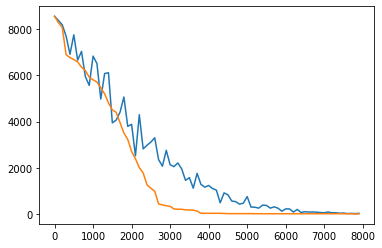

In [66]:
random_dic = random_failure(inet_graph)
targeted_dic = targeted_failure(inet_graph)
x_random, y_random = random_dic.keys(), random_dic.values()
x_target, y_target = targeted_dic.keys(), targeted_dic.values()
plt.plot(x_random, y_random)
plt.plot(x_target, y_target)